In [1]:
import argparse
import numpy as np
from get_data import main
from cnn.training import get_trained_model
from knn.knn import KNN

In [2]:
parser = argparse.ArgumentParser()
parser.add_argument('--config', help='Path to the config file', default='./default_config.yml')
parser.add_argument('--log-dir', help='Path to the log directory', default='../log/')
parser.add_argument('--posters', help='Path to the posters', default='../data/posters/')
parser.add_argument('--models-dir', help='Path to the saved models', default='../data/models/')
parser.add_argument('--sets-dir', help='Path to the training and testing sets', default='../data/sets/')
parser.add_argument('--database', help='Path to the databse csv', default='../data/poster_data.csv')
parser.add_argument('--csv', help='Path to the clean csv', default='../data/')
parser.add_argument('-s', '--save', help='Save model', action='store_true')
parser.add_argument('-v', '--verbose', help='Verbose', action='store_true')

str_args = '-v -s'.split()
args, _ = parser.parse_known_args(str_args)

In [3]:
clean_movies, train_posters, train_genres, train_ids, test_posters, test_genres, test_ids, model_name, save_model, verbose = main(args)

  5%|▌         | 606/11935 [00:00<00:01, 6055.10it/s]

Database already cleaned
Posters database downloading


 87%|████████▋ | 10404/11935 [00:01<00:00, 4700.57it/s]

Error HTTP Error 404: Not Found with film 9532


100%|██████████| 11935/11935 [00:01<00:00, 6487.91it/s]


Database downloaded
Training and testing sets already made


In [4]:
resnet, _ = get_trained_model(model_name)

Loading keras ResNet50V2


## Création des features 

### ResNet

In [5]:
train_features_resnet = resnet.predict(train_posters.astype(np.float32)).reshape(
    (len(train_posters), -1)
)
    
test_features_resnet = resnet.predict(test_posters.astype(np.float32)).reshape(
    (len(test_posters), -1)
)

In [7]:
knn = KNN(3)
knn.fit(train_features_resnet, train_genres)
predicted_genres = knn.predict(test_features_resnet, train_genres)

100%|██████████| 735/735 [02:38<00:00,  4.63it/s]


### Histogrammes de couleurs

RGB

LAB

In [13]:
knn.y

AttributeError: 'KNN' object has no attribute 'y'

In [8]:
import yaml
config = yaml.safe_load(open(args.config))
genres_inv = {config['genres'][k]: k for k in config['genres'].keys()}
print(genres_inv)

{0: 'Action', 1: 'Animation', 2: 'Comédie', 3: 'Comédie dramatique', 4: 'Documentaire', 5: 'Drame', 6: 'Thriller-Policier'}


Affichage des plus proches voisins sur un exemple

In [9]:
# TODO

Calcul des prédictions sur le testing set

genres ['Action', 'Animation', 'Comédie', 'Comédie dramatique', 'Documentaire', 'Drame', 'Thriller-Policier']
accuracy: 0.2789115646258503


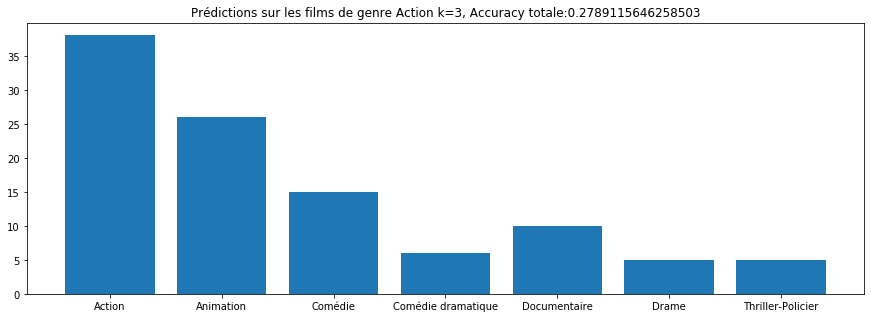

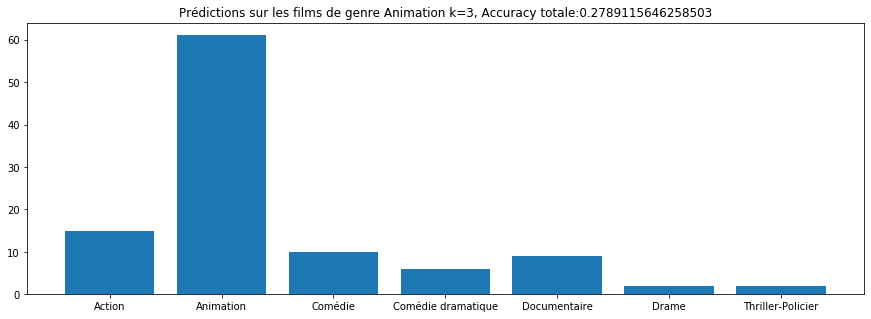

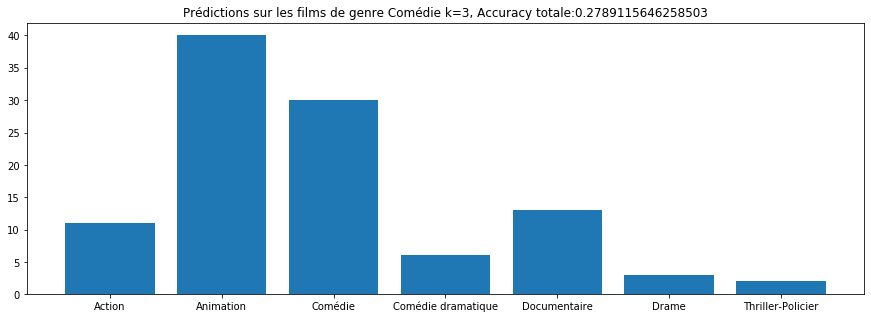

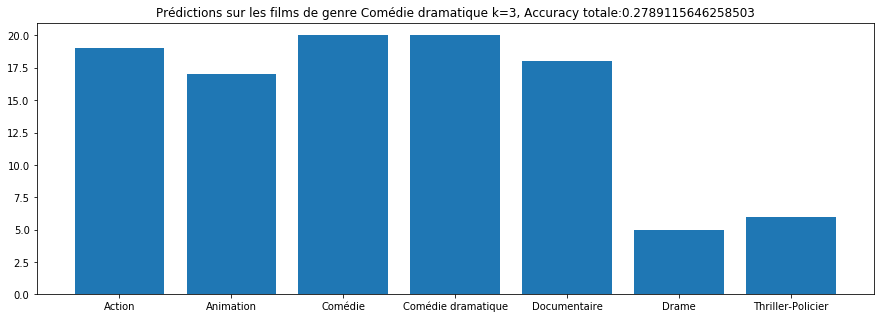

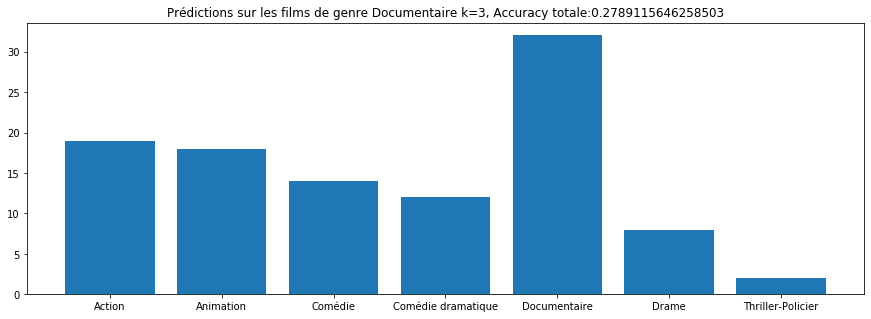

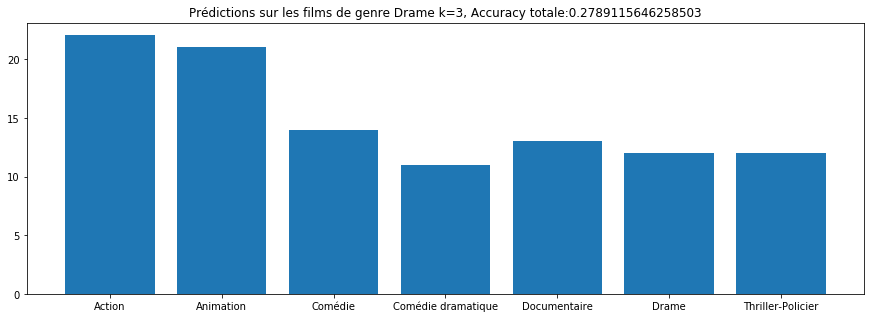

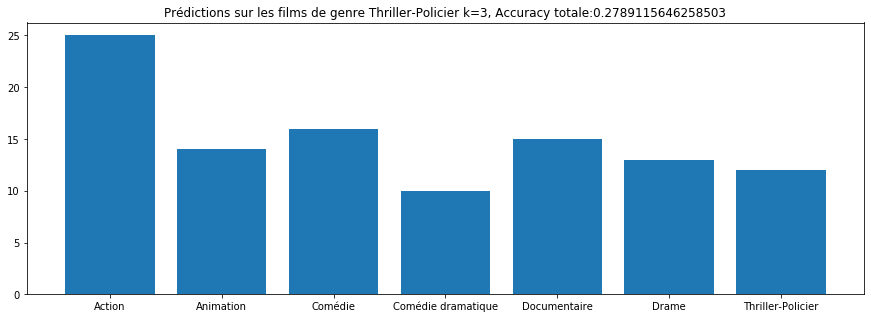

0.2789115646258503

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
k = 3
genres_inv = {config['genres'][k]: k for k in config['genres'].keys()}
print('genres', list(config['genres']))

def visualisation_resultats(predicted_genres, test_genres, kneighbors, save=False):
    predictions = np.array([genres_inv[k] for k in np.argmax(predicted_genres, axis=1)])
    ground_truth = np.array([genres_inv[k] for k in np.argmax(test_genres, axis=1)])

    genres = config["genres"]
    # results_per_genre : matrice donc les lignes sont les vrais genres, et les colonnes sont les genres prédits
    results_per_genre = {
        genre_true : {genre_pred : 0 for genre_pred in genres}
        for genre_true in genres
    }
    #print("results per genre", results_per_genre)
    #print('results per genre ligne', results_per_genre['Action'].values())
    # total_per_genre : vecteur qui comptabilise le nombre de représentants de chaque genre
    total_per_genre = {
        genre : 0
        for genre in genres
    }
    # Mise à jour de results_per_genre et total_per_genre en fonction des prédictions
    n = len(predictions)
    for i in range(n):
        results_per_genre[ground_truth[i]][predictions[i]] += 1
        total_per_genre[ground_truth[i]] += 1

    # Accuracy
    accuracy = 0
    for genre in genres:
        accuracy += results_per_genre[genre][genre]
    accuracy /= len(test_posters)
    print('accuracy:', accuracy)

    # Visualisation:
    genres_list = list(config['genres'])
    for iterateur in genres_list:
        plt.figure(figsize=(15, 5))
        plt.title('Prédictions sur les films de genre ' + iterateur + ' k='+str(k) +", Accuracy totale:" + str(accuracy))
        plt.bar(genres_list, results_per_genre[iterateur].values())
        plt.show()
        if save:
            plt.savefig('../results/Resnet+kNN/'+iterateur+'_k='+str(kneighbors)+'.png')
    return(accuracy)

visualisation_resultats(predicted_genres, test_genres, k)

# Prédiction des genres:

## Creation des features

Les blocs suivant sert à "automatiser" la sélection des features :

Dans le bloc suivant, on définit le dictionnaire en fonction de nos choix de features :

In [ ]:
obs_train = Observations(1) # 4 pour la distance
obs_test = Observations(1)

if RGB_R:
    obs_train.add_histo_feature(np.load('../data/features/histo_rgb_r_train_' + str(RGB_R_bins) + '.npy'))
    obs_test.add_histo_feature(np.load('../data/features/histo_rgb_r_test_' + str(RGB_R_bins) + '.npy'))

if RGB_G:
    obs_train.add_histo_feature(np.load('../data/features/histo_rgb_g_train_' + str(RGB_G_bins) + '.npy'))
    obs_test.add_histo_feature(np.load('../data/features/histo_rgb_g_test_' + str(RGB_G_bins) + '.npy'))

if RGB_B:
    obs_train.add_histo_feature(np.load('../data/features/histo_rgb_b_train_' + str(RGB_B_bins) + '.npy'))
    obs_test.add_histo_feature(np.load('../data/features/histo_rgb_b_test_' + str(RGB_B_bins) + '.npy'))
    
if LAB_L:
    obs_train.add_histo_feature(np.load('../data/features/histo_lab_l_train_' + str(LAB_L_bins) + '.npy'))
    obs_test.add_histo_feature(np.load('../data/features/histo_lab_l_test_' + str(LAB_L_bins) + '.npy'))
    
if LAB_A:
    obs_train.add_histo_feature(np.load('../data/features/histo_lab_a_train_' + str(LAB_A_bins) + '.npy'))
    obs_test.add_histo_feature(np.load('../data/features/histo_lab_a_test_' + str(LAB_A_bins) + '.npy'))
    
if LAB_B:
    obs_train.add_histo_feature(np.load('../data/features/histo_lab_b_train_' + str(LAB_B_bins) + '.npy'))
    obs_test.add_histo_feature(np.load('../data/features/histo_lab_b_test_' + str(LAB_B_bins) + '.npy'))

In [ ]:
k=7
obs_train.compute_distance()

predicted_genres = KNN(
    dataset=clean_movies,
    Xtr=train_posters,
    tr_features=obs_train.observations,
    Ytr=train_genres,
    training_ids=train_ids,
    Xtest=test_posters,
    test_features=obs_test.observations,
    testing_ids=test_ids,
    ind=-1,
    k=k,
    metric=obs_train.distance,
    print_results=False
)

Visualisation des résultats

In [ ]:
genres_inv = {config['genres'][k]: k for k in config['genres'].keys()}
print('genres', list(config['genres']))

def visualisation_resultats(predicted_genres, test_genres, kneighbors, save=False):
    predictions = np.array([genres_inv[k] for k in np.argmax(predicted_genres, axis=1)])
    ground_truth = np.array([genres_inv[k] for k in np.argmax(test_genres, axis=1)])

    genres = config["genres"]
    # results_per_genre : matrice donc les lignes sont les vrais genres, et les colonnes sont les genres prédits
    results_per_genre = {
        genre_true : {genre_pred : 0 for genre_pred in genres}
        for genre_true in genres
    }
    #print("results per genre", results_per_genre)
    #print('results per genre ligne', results_per_genre['Action'].values())
    # total_per_genre : vecteur qui comptabilise le nombre de représentants de chaque genre
    total_per_genre = {
        genre : 0
        for genre in genres
    }
    # Mise à jour de results_per_genre et total_per_genre en fonction des prédictions
    n = len(predictions)
    for i in range(n):
        results_per_genre[ground_truth[i]][predictions[i]] += 1
        total_per_genre[ground_truth[i]] += 1

    # Accuracy
    accuracy = 0
    for genre in genres:
        accuracy += results_per_genre[genre][genre]
    accuracy /= len(test_posters)
    print('accuracy:', accuracy)

    # Visualisation:
    genres_list = list(config['genres'])
    for iterateur in genres_list:
        plt.figure(figsize=(15, 5))
        plt.title('Prédictions sur les films de genre ' + iterateur + ' k='+str(k) +", Accuracy totale:" + str(accuracy))
        plt.bar(genres_list, results_per_genre[iterateur].values())
        plt.show()
        if save:
            plt.savefig('../results/Resnet+kNN/'+iterateur+'_k='+str(kneighbors)+'.png')
    return(accuracy)

In [ ]:
visualisation_resultats(predicted_genres, test_genres, k)